In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
#Instance
model = YOLO('yolov8m-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8m-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 52.4M/52.4M [00:00<00:00, 284MB/s]


In [5]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/Strawberry_yolov8/dataset.yaml

train: /content/drive/MyDrive/Strawberry_yolov8/dataset/train
val: /content/drive/MyDrive/Strawberry_yolov8/dataset/val
nc: 7
names: ["Angular Leafspot", "Anthracnose Fruit Rot", "Blossom Blight", "Gray Mold", "Leaf Spot", "Powdery Mildew Fruit", "Powdery Mildew Leaf"]

In [6]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Strawberry_yolov8/dataset.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Strawberry_yolov8/results"
#Define subdirectory for this specific training
name = "100_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [8]:
# Train the model
results = model.train(data='/content/drive/MyDrive/Strawberry_yolov8/dataset.yaml',
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, #to disable early stopping.
                      batch=4,
                      imgsz=419)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Strawberry_yolov8/dataset.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=419, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Strawberry_yolov8/results, name=100_epochs-5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 89.8MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[419] must be multiple of max stride 32, updating to [448]


train: Scanning /content/drive/MyDrive/Strawberry_yolov8/dataset/train/labels.cache... 1450 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Strawberry_yolov8/dataset/val/labels.cache... 307 images, 11 backgrounds, 0 corrupt: 100%|██████████| 318/318 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 448 train, 448 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.01G      1.012      2.212      2.128      1.385         11        448: 100%|██████████| 364/364 [01:16<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [01:13<00:00,  1.83s/it]

                   all        318        751      0.222      0.482      0.211      0.126      0.208      0.452      0.177     0.0865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.05G      1.044      2.069      1.718      1.379         28        448: 100%|██████████| 364/364 [01:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.04it/s]


                   all        318        751      0.417      0.407      0.424      0.272      0.442      0.404      0.424      0.245

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.06G      1.041      2.008      1.645      1.376         24        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  5.91it/s]


                   all        318        751      0.369       0.62       0.48      0.305      0.517       0.46      0.435      0.266

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.63G      1.055      2.036      1.609      1.372         25        448: 100%|██████████| 364/364 [01:08<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.45it/s]


                   all        318        751      0.591      0.445      0.468      0.304      0.593      0.443      0.465       0.29

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.68G      1.045       1.99      1.627      1.393          9        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.58it/s]


                   all        318        751      0.505      0.583      0.556      0.349      0.542      0.519      0.549      0.344

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.68G     0.9663      1.844      1.503      1.332         29        448: 100%|██████████| 364/364 [01:08<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.38it/s]


                   all        318        751      0.493      0.615       0.55      0.384      0.496       0.59      0.525      0.326

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.71G      0.984      1.858      1.431      1.337         12        448: 100%|██████████| 364/364 [01:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.05it/s]

                   all        318        751      0.548      0.665      0.605      0.448      0.541      0.656      0.609      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.68G     0.9061      1.725      1.353      1.279         20        448: 100%|██████████| 364/364 [01:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.46it/s]


                   all        318        751      0.626       0.58      0.565      0.421      0.614      0.562      0.558      0.381

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.68G     0.8802      1.657      1.282      1.249         12        448: 100%|██████████| 364/364 [01:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]

                   all        318        751      0.567      0.653      0.639      0.476      0.574      0.654      0.644      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.72G     0.8593      1.635       1.23      1.242         20        448: 100%|██████████| 364/364 [01:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.60it/s]


                   all        318        751      0.702      0.613      0.652      0.491       0.69      0.614      0.652      0.452

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.7G     0.8269      1.586      1.173      1.223         26        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.20it/s]

                   all        318        751      0.621      0.673       0.63      0.487      0.639       0.68      0.637      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.64G     0.8236      1.555      1.168      1.213         21        448: 100%|██████████| 364/364 [01:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.45it/s]

                   all        318        751      0.673       0.71       0.71      0.532      0.666      0.709      0.702      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.64G     0.7798      1.496      1.106      1.192         19        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.24it/s]

                   all        318        751      0.633      0.697      0.686      0.513      0.624      0.671      0.672      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.68G     0.7931      1.498      1.097      1.195         29        448: 100%|██████████| 364/364 [01:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.25it/s]


                   all        318        751      0.684      0.674      0.675      0.514      0.694      0.676      0.682      0.485

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.76G     0.7741      1.437      1.055       1.18         32        448: 100%|██████████| 364/364 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.48it/s]

                   all        318        751       0.67       0.73      0.698      0.534      0.669      0.729      0.699      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.66G     0.7829      1.428      1.044      1.192         13        448: 100%|██████████| 364/364 [01:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.31it/s]

                   all        318        751      0.717      0.738      0.746      0.555      0.701      0.717       0.72      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.68G     0.7909      1.455      1.063      1.194         25        448: 100%|██████████| 364/364 [01:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.44it/s]


                   all        318        751      0.636       0.75      0.702      0.519      0.635       0.75       0.71      0.506

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.68G     0.7509      1.358      1.002      1.158         18        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.10it/s]


                   all        318        751      0.757      0.692      0.729      0.572       0.76      0.694      0.729      0.547

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.72G     0.7428      1.365     0.9684      1.158         16        448: 100%|██████████| 364/364 [01:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.38it/s]

                   all        318        751      0.631      0.729      0.737      0.577       0.65      0.741      0.745      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.69G     0.7314      1.338     0.9628      1.145         13        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.21it/s]


                   all        318        751      0.697      0.717      0.734      0.554      0.707      0.708       0.74      0.532

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.69G     0.6986      1.261     0.9259      1.124         16        448: 100%|██████████| 364/364 [01:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.52it/s]

                   all        318        751      0.739      0.687       0.71       0.54      0.734      0.682      0.703      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.73G     0.7118      1.321     0.9213      1.144         20        448: 100%|██████████| 364/364 [01:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.11it/s]

                   all        318        751      0.697      0.705      0.728       0.56      0.708      0.684      0.722      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.66G     0.7126      1.317     0.9097       1.13         26        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.20it/s]

                   all        318        751      0.652      0.763      0.714      0.573      0.653      0.768      0.709      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.66G     0.6886      1.262     0.8912       1.13         15        448: 100%|██████████| 364/364 [01:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]

                   all        318        751      0.643       0.82      0.769      0.602       0.63      0.806      0.752       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.7G      0.709      1.285     0.9174      1.133         33        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.35it/s]

                   all        318        751      0.675      0.746      0.742      0.599       0.69      0.756      0.747      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.61G     0.6806      1.253     0.8653      1.115         27        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]


                   all        318        751      0.721      0.746      0.765      0.591      0.724      0.752      0.768      0.562

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.74G       0.69      1.266     0.8868      1.122         17        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

                   all        318        751      0.766      0.787      0.787       0.61      0.759      0.779      0.775      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.61G     0.6699      1.236     0.8489      1.109         12        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.15it/s]

                   all        318        751      0.764      0.751      0.734      0.598      0.766      0.754      0.742      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.7G     0.6819      1.246     0.8523       1.12         34        448: 100%|██████████| 364/364 [01:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.43it/s]


                   all        318        751       0.85      0.721      0.795      0.627      0.848       0.72      0.786      0.605

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.7G     0.6526      1.179     0.8198      1.098         17        448: 100%|██████████| 364/364 [01:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.16it/s]

                   all        318        751       0.79      0.754      0.797      0.626      0.817       0.76      0.811      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.66G     0.6513      1.178      0.803      1.088         20        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.41it/s]

                   all        318        751      0.768      0.758      0.773      0.601       0.78      0.764      0.785      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.72G     0.6454      1.161     0.7779      1.091         24        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]

                   all        318        751      0.755      0.777      0.798      0.598       0.75      0.772      0.788      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       1.7G     0.6384      1.142     0.7755      1.088         18        448: 100%|██████████| 364/364 [01:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.47it/s]

                   all        318        751       0.75      0.782      0.796      0.642      0.748      0.782      0.789      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.68G     0.6313      1.131     0.7677      1.083         22        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751       0.77      0.779      0.807      0.641      0.841      0.752      0.821      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.62G     0.6162      1.121     0.7502      1.075         18        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.46it/s]

                   all        318        751      0.794      0.751      0.805      0.643      0.781      0.761      0.795      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.64G     0.6225      1.114     0.7355      1.067         18        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.20it/s]

                   all        318        751      0.795      0.769      0.818       0.64      0.776      0.785      0.823      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.62G     0.6157      1.132     0.7497      1.071         26        448: 100%|██████████| 364/364 [01:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.47it/s]

                   all        318        751      0.726      0.821      0.837      0.653      0.726      0.812      0.829      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.66G     0.6094      1.102     0.7299      1.073         28        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]


                   all        318        751      0.783      0.756      0.789      0.638      0.778      0.751      0.776      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       1.7G     0.6171      1.113     0.7363      1.077         16        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.38it/s]

                   all        318        751      0.716      0.815      0.807      0.639      0.723      0.824      0.817      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.68G     0.6038      1.103     0.7204      1.061         13        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]

                   all        318        751      0.844      0.799      0.842      0.661      0.846        0.8       0.85      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       1.7G     0.6052       1.11     0.7078      1.069         19        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.41it/s]

                   all        318        751      0.764      0.815       0.82      0.647      0.764      0.815       0.82      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.7G     0.5957      1.069     0.7073      1.056         22        448: 100%|██████████| 364/364 [01:06<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]

                   all        318        751        0.8      0.768      0.827      0.662      0.812      0.774      0.837      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.61G     0.5838      1.029     0.6729      1.049         20        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.47it/s]

                   all        318        751      0.797      0.793      0.817      0.645      0.803      0.798      0.823      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.68G     0.5787      1.028     0.6752      1.049         16        448: 100%|██████████| 364/364 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751      0.778      0.827      0.842      0.673      0.785      0.833      0.846      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.7G      0.592      1.049     0.6795      1.068         21        448: 100%|██████████| 364/364 [01:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.42it/s]

                   all        318        751      0.788      0.862      0.851       0.68      0.791      0.865      0.851      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.7G     0.5826      1.033     0.6766      1.048         34        448: 100%|██████████| 364/364 [01:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]

                   all        318        751      0.763      0.774      0.813      0.659      0.794      0.793      0.837      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.65G     0.5714      1.032     0.6474      1.041         27        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.42it/s]

                   all        318        751       0.78      0.798      0.824      0.676       0.81      0.786      0.841       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.67G     0.5741       1.03     0.6696      1.041         30        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751      0.773      0.842      0.844       0.69      0.776      0.846      0.846      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.76G     0.5651      1.033     0.6479      1.034         37        448: 100%|██████████| 364/364 [01:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.39it/s]

                   all        318        751      0.796      0.816      0.835      0.689      0.815       0.82      0.856      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.71G     0.5556      1.001     0.6288      1.031         10        448: 100%|██████████| 364/364 [01:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751      0.806      0.795      0.824      0.659      0.822      0.803      0.847      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.68G     0.5555      1.009     0.6479      1.037         23        448: 100%|██████████| 364/364 [01:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.17it/s]


                   all        318        751      0.785      0.813      0.828      0.675      0.789      0.818      0.839      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.64G     0.5662      1.009     0.6379      1.042         23        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.11it/s]

                   all        318        751       0.67      0.763      0.698      0.567      0.678      0.766      0.704      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.69G     0.5483     0.9768      0.607      1.031         22        448: 100%|██████████| 364/364 [01:06<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.52it/s]

                   all        318        751       0.78      0.841      0.866      0.698       0.78      0.845      0.867      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.61G      0.546     0.9907     0.6292      1.028         21        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.22it/s]

                   all        318        751      0.809      0.831      0.859      0.705      0.813      0.831      0.852      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.67G     0.5439     0.9738     0.6118       1.03         23        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.42it/s]

                   all        318        751      0.692      0.804      0.782      0.643      0.701      0.808      0.787      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.69G     0.5355      0.948     0.5925      1.025         22        448: 100%|██████████| 364/364 [01:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]

                   all        318        751      0.851      0.813      0.863      0.695      0.845      0.807      0.857      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.67G     0.5421     0.9685     0.6021      1.021         20        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.33it/s]

                   all        318        751      0.844      0.834      0.883      0.717      0.839       0.83      0.873      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.67G     0.5372     0.9569     0.5835      1.026         24        448: 100%|██████████| 364/364 [01:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]

                   all        318        751      0.828      0.822      0.854      0.694      0.835      0.828      0.859      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.67G     0.5426     0.9535     0.6041      1.021         14        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

                   all        318        751      0.825       0.82      0.839      0.693      0.829      0.824      0.844       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.68G     0.5316     0.9345     0.5791      1.016         12        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.10it/s]

                   all        318        751      0.799      0.799      0.824      0.687      0.803      0.802      0.831      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       1.7G     0.5156     0.9064     0.5543      1.001         25        448: 100%|██████████| 364/364 [01:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.33it/s]

                   all        318        751       0.85      0.841      0.856      0.701      0.846      0.837       0.85      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.62G     0.5238     0.9405      0.568      1.022         25        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.18it/s]

                   all        318        751      0.812      0.837      0.849      0.693      0.808      0.833      0.843      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       1.7G     0.5182      0.905     0.5537      1.009         21        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.24it/s]

                   all        318        751      0.785      0.847      0.848        0.7      0.781      0.842      0.844      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.75G     0.5216      0.921     0.5448      1.016         35        448: 100%|██████████| 364/364 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.13it/s]

                   all        318        751      0.805      0.845      0.835      0.687      0.808      0.849      0.834      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.72G     0.5069     0.8857     0.5331      1.003         28        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.37it/s]

                   all        318        751      0.817      0.848      0.873      0.723      0.812      0.844      0.868      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.63G     0.5081     0.8927     0.5337     0.9996         28        448: 100%|██████████| 364/364 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.16it/s]

                   all        318        751      0.849      0.789       0.85      0.699      0.853      0.795      0.845      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.67G     0.5071      0.904     0.5419      1.002         20        448: 100%|██████████| 364/364 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.37it/s]

                   all        318        751      0.796       0.82      0.852      0.706      0.796      0.823      0.844      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.77G     0.5014     0.9001     0.5288     0.9931         13        448: 100%|██████████| 364/364 [01:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.20it/s]

                   all        318        751      0.891      0.831       0.89       0.74      0.901      0.833      0.891      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.74G     0.5009     0.8901     0.5348     0.9983         19        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.52it/s]

                   all        318        751       0.83      0.857      0.872      0.709      0.834       0.86      0.878      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.67G     0.4885     0.8807     0.5108     0.9844         25        448: 100%|██████████| 364/364 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.34it/s]

                   all        318        751      0.826      0.854      0.869      0.715      0.829      0.857      0.865      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.61G      0.489     0.8767     0.5056     0.9948         19        448: 100%|██████████| 364/364 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.52it/s]


                   all        318        751      0.819       0.89       0.88      0.732      0.814      0.886      0.869      0.696

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.69G     0.4919     0.8699     0.5089     0.9887         26        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.13it/s]

                   all        318        751      0.831      0.874      0.891      0.743      0.845      0.862      0.887      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.67G     0.4801     0.8762     0.5073      0.987         12        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.56it/s]

                   all        318        751      0.847      0.844      0.877      0.717      0.843      0.838      0.865      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.63G     0.4867     0.8643     0.5046     0.9851         18        448: 100%|██████████| 364/364 [01:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.31it/s]

                   all        318        751      0.828      0.852      0.878      0.721      0.826      0.854      0.876       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.65G     0.4858     0.8469     0.4852     0.9934         20        448: 100%|██████████| 364/364 [01:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

                   all        318        751      0.859      0.872      0.883      0.732       0.86      0.875      0.883      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.63G     0.4886     0.8727     0.4909     0.9931         32        448: 100%|██████████| 364/364 [01:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]

                   all        318        751      0.872      0.846      0.894      0.749      0.872      0.845      0.888      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.69G     0.4682     0.8472     0.4819     0.9774         24        448: 100%|██████████| 364/364 [01:07<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.44it/s]

                   all        318        751      0.839      0.878      0.894      0.746      0.836      0.874      0.885      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.67G     0.4683     0.8309     0.4704     0.9814         15        448: 100%|██████████| 364/364 [01:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.62it/s]


                   all        318        751      0.845       0.89      0.883      0.729      0.843       0.89      0.878      0.698

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.61G     0.4692     0.8314     0.4607     0.9842         26        448: 100%|██████████| 364/364 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.64it/s]

                   all        318        751      0.843      0.873      0.885      0.743       0.84      0.871      0.877      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.69G     0.4794     0.8203     0.4697     0.9802         13        448: 100%|██████████| 364/364 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.19it/s]

                   all        318        751      0.869      0.841      0.886      0.738      0.868      0.838       0.88      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       1.7G      0.472     0.8433     0.4717     0.9851         21        448: 100%|██████████| 364/364 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]

                   all        318        751      0.859      0.874      0.896      0.745      0.854      0.869      0.886      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.65G     0.4701     0.8391     0.4617     0.9818         22        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.41it/s]

                   all        318        751      0.877      0.844       0.89      0.745      0.872      0.839      0.885      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.69G     0.4603     0.8206     0.4453     0.9737         27        448: 100%|██████████| 364/364 [01:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]

                   all        318        751      0.862      0.877      0.886      0.737      0.853      0.867      0.876      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.67G     0.4446     0.7902     0.4418     0.9614         25        448: 100%|██████████| 364/364 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.41it/s]


                   all        318        751      0.835      0.911      0.909      0.758      0.867      0.853      0.897      0.721

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.69G     0.4605     0.8167     0.4461     0.9714         12        448: 100%|██████████| 364/364 [01:06<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.25it/s]

                   all        318        751      0.873      0.849      0.894      0.746      0.871      0.846      0.885       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.69G     0.4627     0.8251     0.4569     0.9746         27        448: 100%|██████████| 364/364 [01:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.39it/s]

                   all        318        751      0.858      0.884      0.901      0.744      0.862      0.874      0.893      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.67G     0.4467     0.7832      0.427     0.9635         23        448: 100%|██████████| 364/364 [01:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.29it/s]

                   all        318        751       0.84      0.893      0.892      0.754      0.837      0.889      0.884      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.74G     0.4468     0.8066     0.4394     0.9705         30        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.30it/s]

                   all        318        751      0.862      0.893      0.903      0.762       0.86      0.883      0.892      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.69G     0.4458     0.8155     0.4367     0.9594         16        448: 100%|██████████| 364/364 [01:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]

                   all        318        751      0.858      0.882      0.898      0.752      0.857      0.876      0.887      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.69G     0.4474     0.7967     0.4201     0.9649         18        448: 100%|██████████| 364/364 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

                   all        318        751      0.865      0.877      0.899       0.75      0.862      0.874      0.889      0.718


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.61G     0.3619     0.6979     0.3639     0.9116          7        448: 100%|██████████| 364/364 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751      0.832      0.903      0.896      0.755      0.831      0.901      0.888       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.67G     0.3635     0.6847     0.3249     0.9161          9        448: 100%|██████████| 364/364 [01:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

                   all        318        751      0.879       0.88      0.907      0.767      0.877      0.878      0.899      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.67G     0.3613     0.6737     0.3326     0.9193          7        448: 100%|██████████| 364/364 [01:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

                   all        318        751      0.884      0.899      0.902      0.763      0.882      0.896      0.894      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.67G     0.3633     0.6704     0.3276     0.9153          7        448: 100%|██████████| 364/364 [01:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  5.77it/s]

                   all        318        751      0.854      0.899      0.897      0.748      0.849      0.895      0.888      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.67G     0.3453     0.6655     0.3101     0.9053          6        448: 100%|██████████| 364/364 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.30it/s]


                   all        318        751        0.9      0.884      0.903      0.764      0.896      0.879      0.891      0.724

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.65G     0.3444     0.6683     0.3121     0.9063          6        448: 100%|██████████| 364/364 [01:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.20it/s]

                   all        318        751      0.892      0.883      0.904      0.763      0.888      0.877       0.89       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.61G     0.3369     0.6586     0.3051     0.9009          7        448: 100%|██████████| 364/364 [01:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.38it/s]

                   all        318        751      0.884      0.886      0.896      0.753       0.88      0.882      0.883      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.67G     0.3408     0.6422     0.2934     0.8972         18        448: 100%|██████████| 364/364 [01:06<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]

                   all        318        751        0.9      0.878        0.9      0.763      0.896      0.875      0.888      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.68G     0.3365     0.6542     0.3022     0.9018          6        448: 100%|██████████| 364/364 [01:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.38it/s]

                   all        318        751        0.9       0.88      0.903      0.768      0.894      0.874       0.89      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.59G     0.3231     0.6335     0.2771     0.8904         19        448: 100%|██████████| 364/364 [01:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  5.77it/s]

                   all        318        751      0.901      0.879      0.905      0.763      0.896      0.873      0.892      0.732



100 epochs completed in 2.119 hours.
Optimizer stripped from /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-5/weights/last.pt, 54.8MB
Optimizer stripped from /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-5/weights/best.pt, 54.8MB

Validating /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.02it/s]


                   all        318        751        0.9       0.88      0.903      0.769      0.894      0.874       0.89      0.732
      Angular Leafspot        318         52       0.96      0.927      0.954      0.885      0.916      0.885      0.864      0.668
 Anthracnose Fruit Rot        318         17      0.768      0.882      0.768      0.556      0.769      0.882      0.768      0.529
        Blossom Blight        318         44      0.965          1      0.991      0.896      0.965          1      0.991       0.86
             Gray Mold        318        108      0.945      0.799       0.89      0.612      0.945      0.798      0.885      0.655
             Leaf Spot        318        257      0.924      0.952      0.936      0.897      0.924      0.951      0.937      0.889
  Powdery Mildew Fruit        318         18       0.83      0.889      0.935      0.763      0.831      0.889      0.935       0.76
   Powdery Mildew Leaf        318        255      0.905      0.711   

In [9]:
from IPython.display import Image

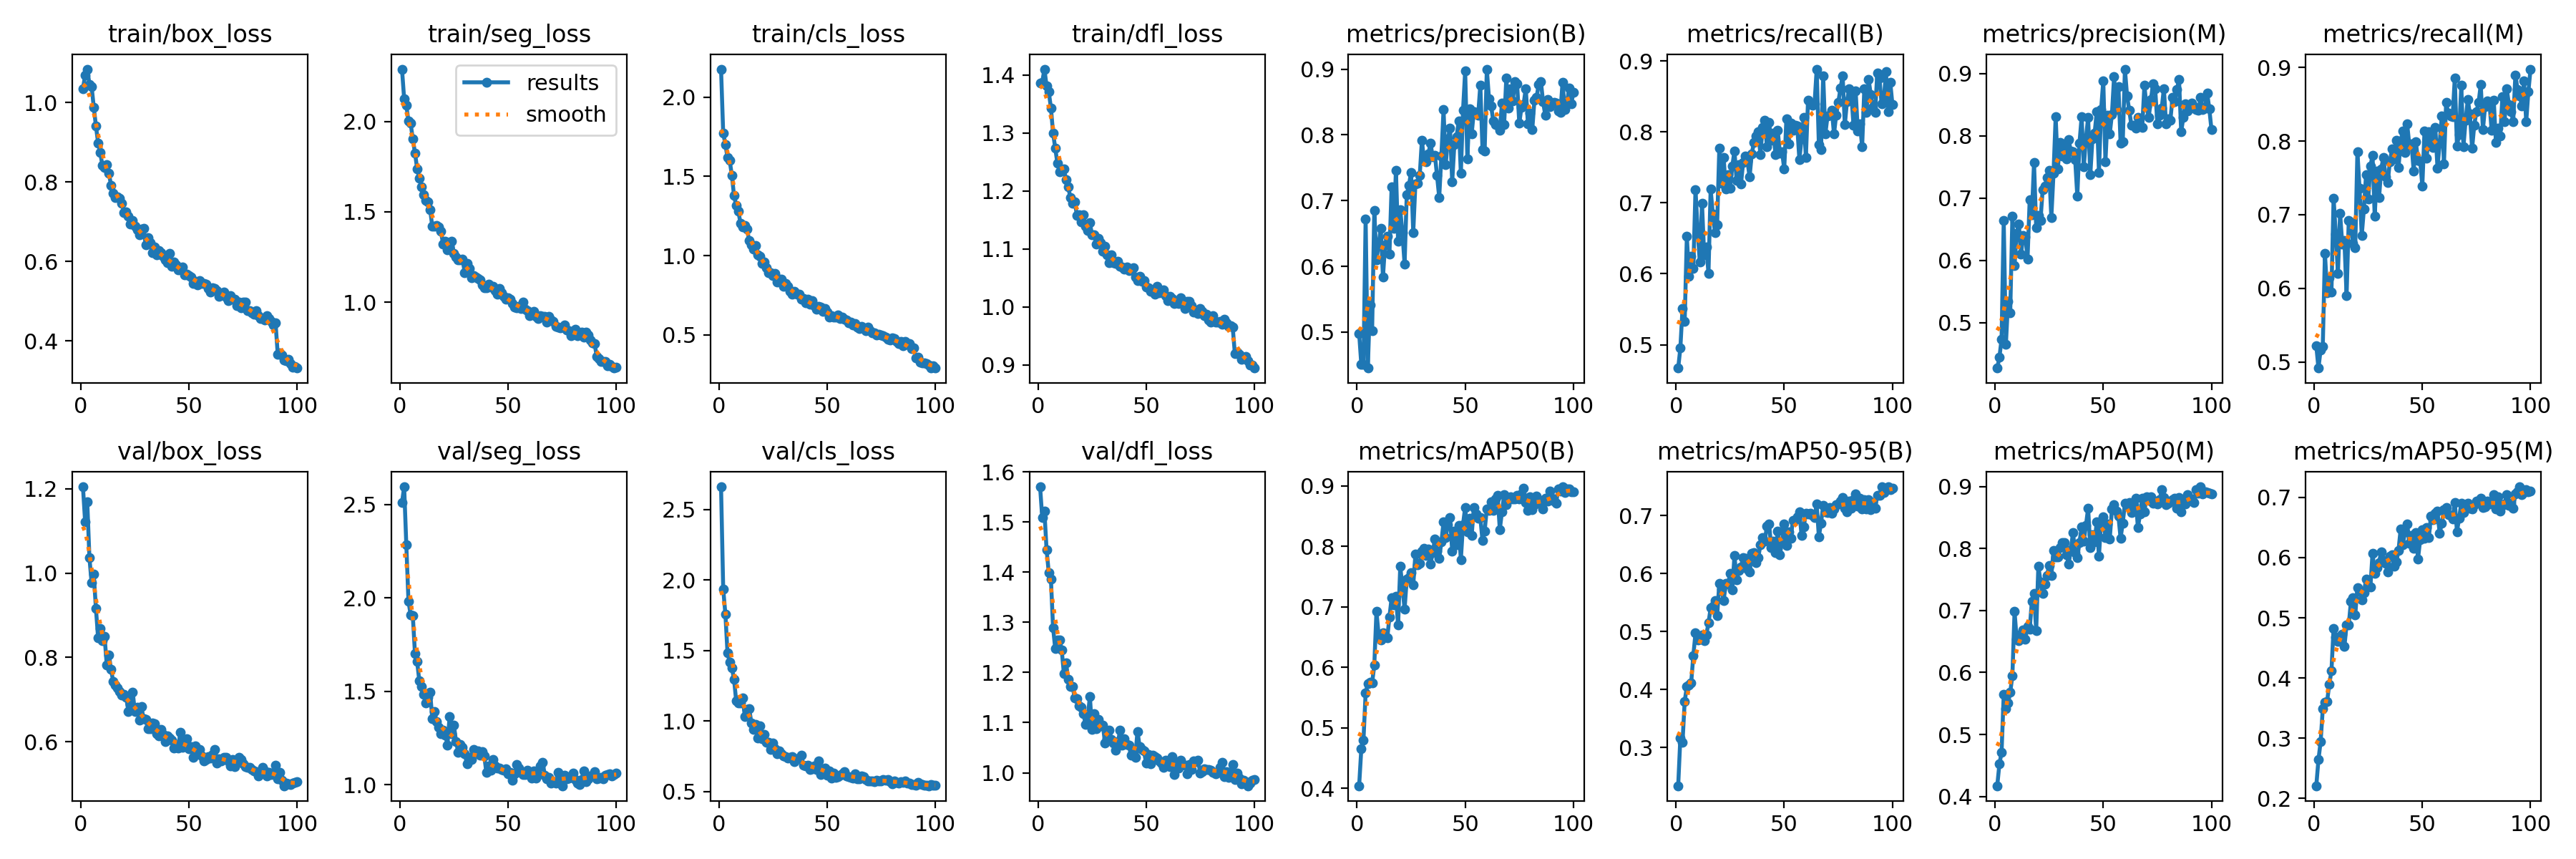

In [ ]:
Image("/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/results.png")

In [ ]:
# Image(filename='/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/train_batch32762.jpg', width=600)

In [ ]:
# Image("/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/confusion_matrix.png")

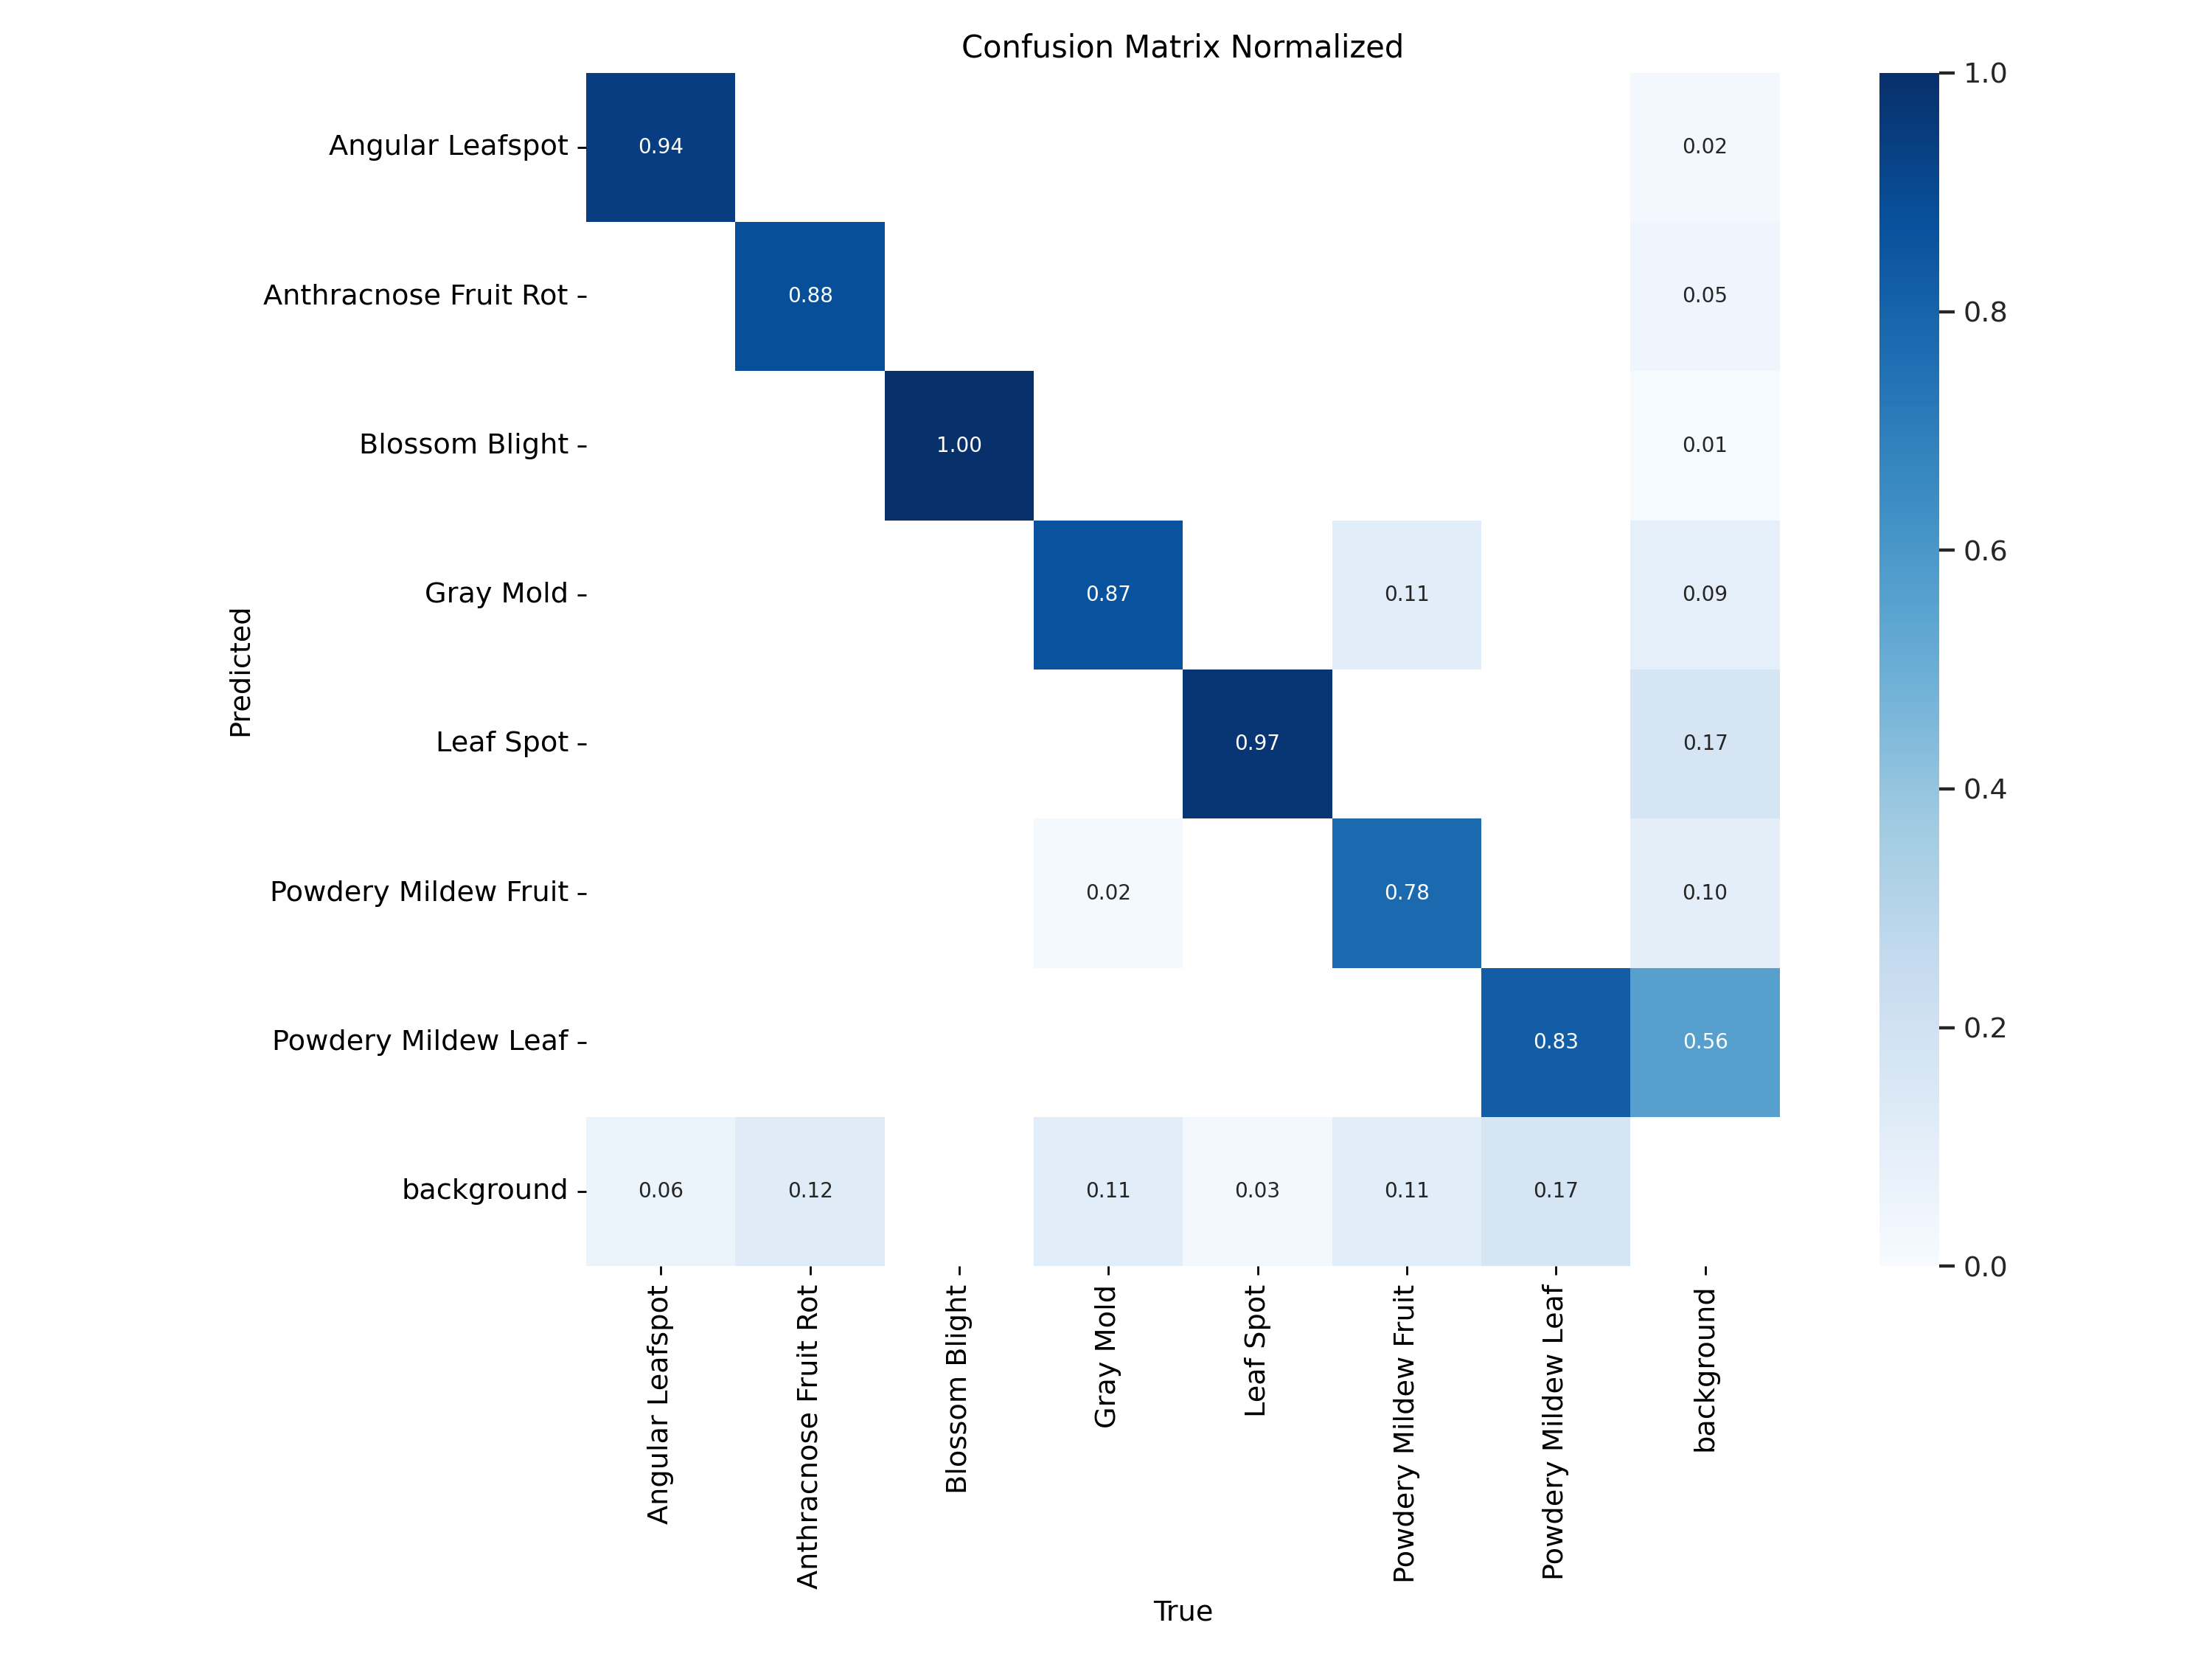

In [ ]:
# Image(filename='/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/confusion_matrix_normalized.png', width=600)
Image("/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/confusion_matrix_normalized.png",width=600)

In [ ]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights

best.onnx  best.pt  best_saved_model/  last.pt


In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt')

In [ ]:
new_image = '/content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/09be62244d07c362393a1f037efc31af.png'
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold



image 1/1 /content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/09be62244d07c362393a1f037efc31af.png: 448x448 2 Powdery Mildew Leafs, 2689.9ms
Speed: 12.1ms preprocess, 2689.9ms inference, 6848.2ms postprocess per image at shape (1, 3, 448, 448)


In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(new_result_array)

In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt')
new_image = '/content/drive/MyDrive/Strawberry_yolov8/1.png'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(new_result_array)


image 1/1 /content/drive/MyDrive/R2-input.jpg: 448x448 8 Powdery Mildew Leafs, 987.8ms
Speed: 2.1ms preprocess, 987.8ms inference, 22.1ms postprocess per image at shape (1, 3, 448, 448)


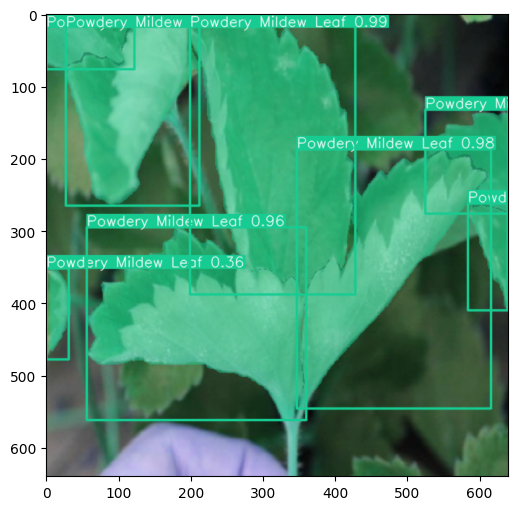

In [ ]:
my_new_model = YOLO('/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt')
new_image = '/content/drive/MyDrive/R2-input.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(new_result_array)

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt

# # Path to the test folder
# test_folder = '/content/drive/MyDrive/Strawberry_yolov8/dataset/test/images/'

# # Get a list of all images in the test folder
# all_images = os.listdir(test_folder)

# # Randomly select 5 images from the list
# selected_images = random.sample(all_images, 5)

# # Plot the output images
# for image_name in selected_images:
#     # Path to the selected image
#     image_path = os.path.join(test_folder, image_name)

#     # Predict bounding boxes for the selected image
#     new_results = my_new_model.predict(image_path, conf=0.5)
#     new_result_array = new_results[0].plot()

#     # Plot the original image along with the predicted bounding boxes
#     plt.figure(figsize=(6, 6))
#     plt.imshow(new_result_array)
#     plt.title(f'Image: {image_name}')
#     plt.axis('off')
#     plt.show()


In [ ]:

# class_names = new_result.names.values()
# class_names

In [ ]:
# # Extracting bounding boxes and segmented masks from the result

# new_result = new_results[0]
# new_result

In [ ]:
# new_result.masks.xyn

In [ ]:
# extracted_masks = new_result.masks.data

In [ ]:
# extracted_masks.shape

In [ ]:
# masks_array = extracted_masks.cpu().numpy()

In [ ]:
# # plt.imshow(masks_array[0])
# import matplotlib.pyplot as plt

# # Assuming masks_array is a list or array containing masks
# for mask in masks_array:
#     plt.imshow(mask)
#     plt.show()


In [ ]:
# # Extract the boxes, which likely contain class IDs
# detected_boxes = new_result.boxes.data
# # Extract class IDs from the detected boxes
# class_labels = detected_boxes[:, -1].int().tolist()
# # Initialize a dictionary to hold masks by class
# masks_by_class = {name: [] for name in new_result.names.values()}

# # Iterate through the masks and class labels
# for mask, class_id in zip(extracted_masks, class_labels):
#     class_name = new_result.names[class_id]  # Map class ID to class name
#     masks_by_class[class_name].append(mask.cpu().numpy())

In [ ]:
# import pandas as pd
# from skimage.measure import regionprops

# # Initialize a list to store the properties
# props_list = []

# # Iterate through all classes
# for class_name, masks in masks_by_class.items():
#     # Iterate through the masks for this class
#     for mask in masks:
#         # Convert the mask to an integer type if it's not already
#         mask = mask.astype(int)

#         # Apply regionprops to the mask
#         props = regionprops(mask)

#         # Extract the properties you want (e.g., area, perimeter) and add them to the list
#         for prop in props:
#             area = prop.area
#             perimeter = prop.perimeter
#             # Add other properties as needed

#             # Append the properties and class name to the list
#             props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# # Convert the list of dictionaries to a DataFrame
# props_df = pd.DataFrame(props_list)

# # Now props_df contains the properties and class names for all regions

# # Save the DataFrame to a CSV file
# props_df.to_csv('/content/drive/MyDrive/Strawberry_yolov8/YOLOv8_object_properties.csv', index=False)

In [ ]:
# import seaborn as sns

# # Create the swarm plot with Seaborn
# sns.swarmplot(x='Class Name', y='Area', data=props_df)

# # Add labels and a title
# plt.xlabel('Class Name')
# plt.ylabel('Area')
# plt.title('Area of Objects for Each Class')

# # Rotate the x-axis labels for better visibility if needed
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


In [ ]:
# sns.boxplot(x='Class Name', y='Area', data=props_df)
# # Add labels and a title
# plt.xlabel('Class Name')
# plt.ylabel('Area')
# plt.title('Area of Objects for Each Class')

# # Rotate the x-axis labels for better visibility if needed
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()

In [ ]:
# my_new_model = YOLO('/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt')

In [ ]:
# # Export the model
# my_new_model.export(format='onnx', imgsz=[448,448])


Ultralytics YOLOv8.1.35 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt' with input shape (1, 3, 448, 448) BCHW and output shape(s) ((1, 43, 4116), (1, 32, 112, 112)) (52.3 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 6.4s, saved as '/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx' (104.0 MB)

Export complete (11.4s)
Results saved to /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights
Predict:         yolo predict task=segment model=/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx imgsz=448  
Validate:        yolo val task=segment model=/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx imgsz=448 data=/content/drive/MyDrive/Strawberry_yolov8/dat

'/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx'

In [ ]:
!pip install tensorflow


In [ ]:
!pip install tflite-model-maker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.1/580.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install onnx-tf


In [ ]:
!onnx-tf convert -i /content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx -o /content/drive/MyDrive/Strawberry_yolov8/Tensor/output


2024-03-25 14:19:01.693981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 14:19:01.694069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 14:19:01.696221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our Tens

In [ ]:
import tensorflow as tf

# Load the TensorFlow SavedModel
saved_model_dir = '/content/drive/MyDrive/Strawberry_yolov8/Tensor/output'  # Path to the directory containing the SavedModel

# Create a TFLite converter with flex ops enabled
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_file = 'converted_model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)


In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]


In [ ]:
%cd /content/drive/MyDrive/Strawberry_yolov8/ultralytics

/content/drive/MyDrive/Strawberry_yolov8/ultralytics


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt')

# Export the model to TFLite format
model.export(format='tflite') # creates 'yolov8n_float32.tflite'

# Load the exported TFLite model
tflite_model = YOLO('yolov8n_float32.tflite')

# Run inference
# results = tflite_model('https://ultralytics.com/images/bus.jpg')

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.pt' with input shape (1, 3, 448, 448) BCHW and output shape(s) ((1, 43, 4116), (1, 32, 112, 112)) (52.3 MB)

TensorFlow SavedModel: starting export with tensorflow 2.15.0...
WARNING ⚠️ tensorflow<=2.13.1 is required, but tensorflow==2.15.0 is currently installed https://github.com/ultralytics/ultralytics/issues/5161

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 7.1s, saved as '/content/drive/MyDrive/Strawberry_yolov8/results/100_epochs-3/weights/best.onnx' (104.0 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export failure ❌ 33.4s: generic_type: cannot initialize type "StatusCode": an object with that

ImportError: generic_type: cannot initialize type "StatusCode": an object with that name is already defined